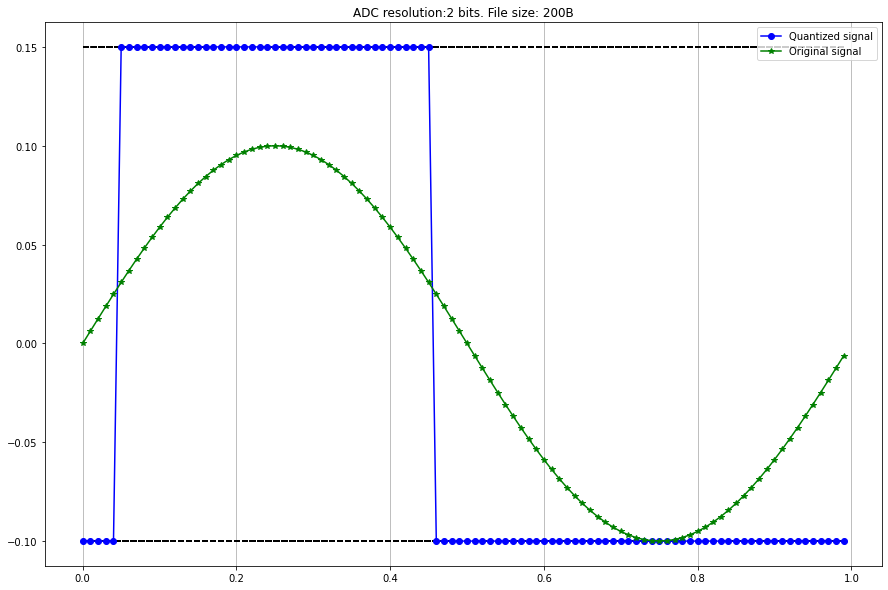

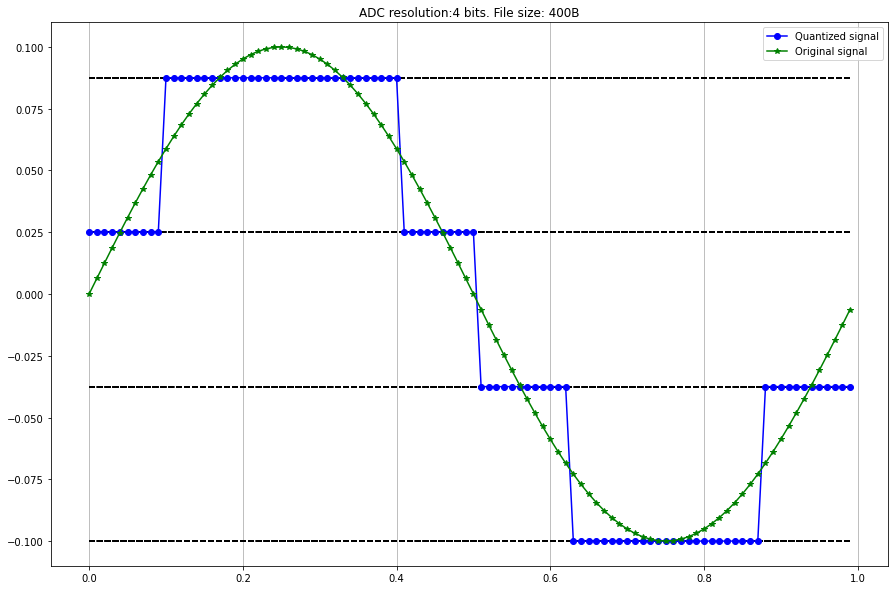

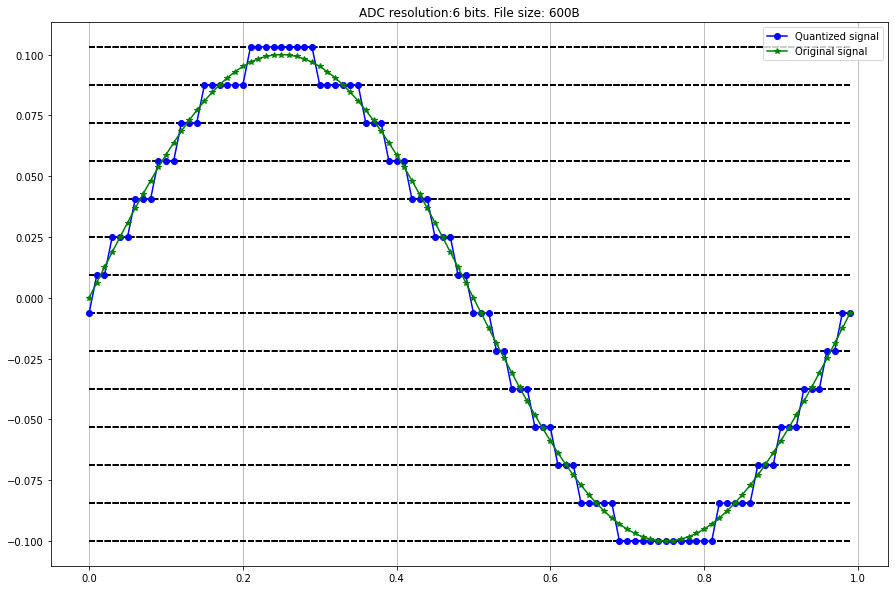

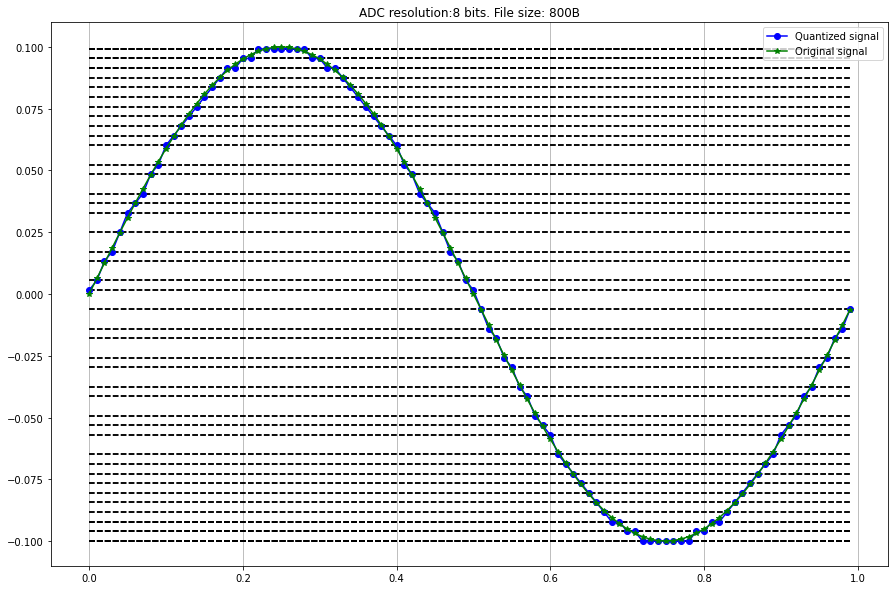

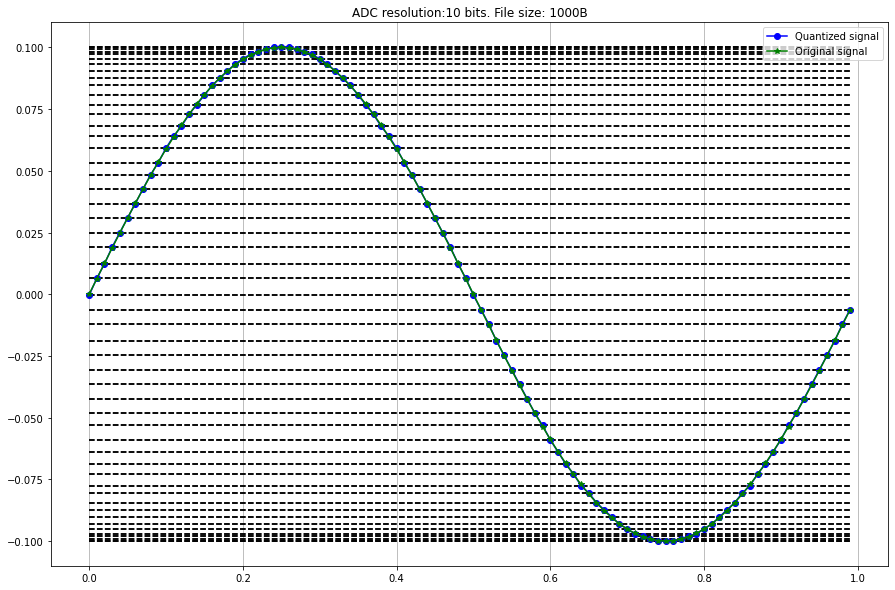

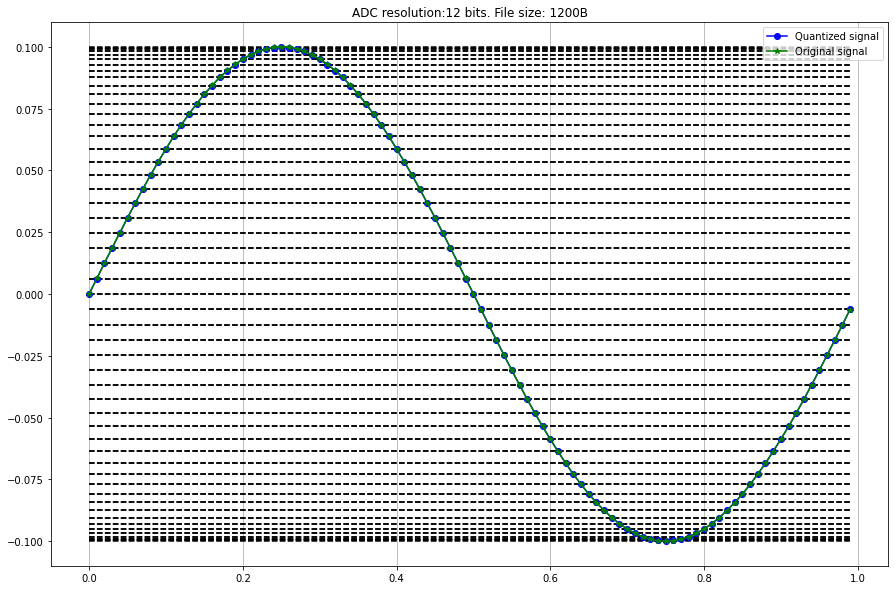

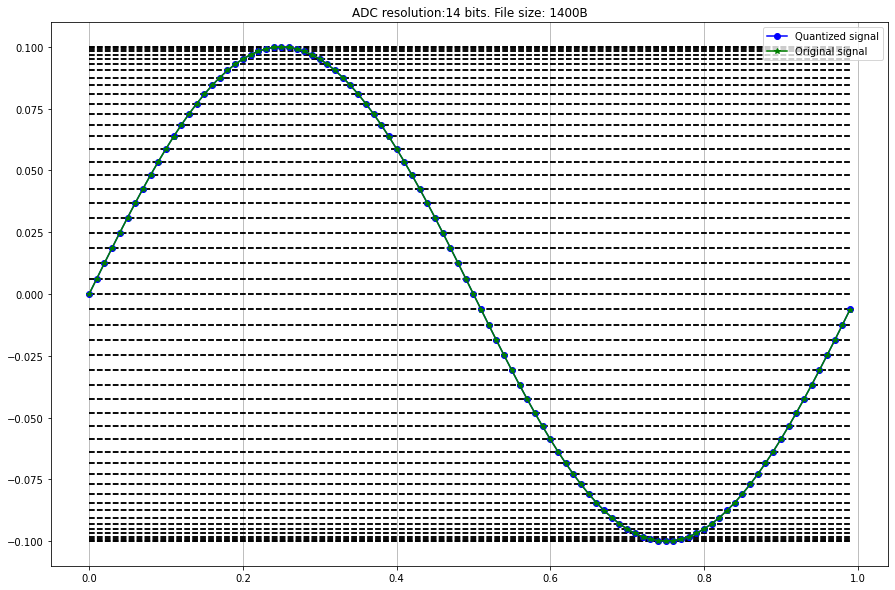

In [23]:
# %%=============================================================================
# Раздел квантования
# =============================================================================
# find the closest possible value of ADC-output to the signal value

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin

def get_quantized (acd_dig,contin_sig):
    mn = []
    new_y = []
    for i in range(len(contin_sig)):
        m =[]
        for j in range(len(acd_dig)):
          m.append(np.abs(acd_dig[j] -contin_sig[i]))
        brother_num = np.argmin(m)
        mn.append(brother_num)
        new_y.append(acd_dig[brother_num])
    return new_y
    
def quantizition_sim (A=1, bits=6, frq=1):
    '''
    
    input:
        A is signal amplitude , default = 1
        bits -  Analoge-digital converter (ADC) digits
    output:
        quantizied_sig
    '''

    # 1. Create signal model
    fs = 100 # sampling frequency
    f = frq # main frequency
    T= 1/fs # time sapmpling 
    sec = 1 # time durarion
    t = np.arange(0,sec,T) # time array
    y = A*sin(2*pi*f*t) # model signal
    
    # 2. create quantizition model
    min_y = np.min(y) # min value of signal
    max_y = np.max(y)  # max value of signal
   
    ADC_level = 2**bits # levels of ADC
    step = 1/ADC_level # Steps
    z = np.arange(min_y,max_y+step, step) # possible values of output signal 
    
    # get quantizied signal
    quantizied_sig = np.array(get_quantized (z, y))
    D = sec*fs*bits

    
    # create and plot a quantization grid
    grd = np.zeros((len(quantizied_sig), len(quantizied_sig)), dtype=quantizied_sig.dtype)
    plt.figure(figsize=[15, 10])
    for i in range(len(quantizied_sig)):
      grd[i,:] = quantizied_sig[i]
      plt.plot( t, grd[i,:], '--k')
    
    # plot original and quantizied signals
    plt.plot(t,quantizied_sig,'o-b', label = 'Quantized signal')
    plt.plot(t,y, '-*g', label = 'Original signal')
    plt.legend(loc ='upper right')
    plt.title(f'ADC resolution:{bits} bits. File size: {D}B')
    plt.grid(axis ='x')
    plt.show()
    return quantizied_sig

f = 1
for i in range(2,16,2):
    quantizition_sim (A=0.1, bits=i, frq=f)
